# [EEP 118] Introductory Applied Econometrics, Fall 2023

# Problem Set 1

* Instructor: Aprajit Mahajan
* GSIs: Abdoulaye Cisse and Shuo Yu

**About This Notebook**
* This notebook is meant to guide you to answer parts c, d, e, f, g, h and i of Question 4 in the homework. You can use it to run the codes needed to answers questions in these sections of the homework. Once you run these codes, you can rely on the output generated to write your answers in the same PDF file where you answer the other questions. Do not put your answers directly in this notebook. Please submit all your answers in one PDF file on Gradescope.

* When you are done with all lines of codes, please restart the kernel and run all the codes one more time (press the ">>" button), so that the grader will see a clean notebook. Don't forget to save!

## Set  Up

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
import seaborn as sns
sns.set_style("whitegrid") # Set Seaborn style

## Question 4

**(Simulation Exercise illustrating Large Sample Distribution
based Hypothesis Testing)**

Consider the following model. We observe an
i.i.d. sample $\left\{ Y_{i},X_{i}\right\} _{i=1}^{n}$ where where $Y_{i}$
is generated according to
\begin{equation}
Y_{i}=1-2X_{i}+\epsilon _{i}  \label{linmod} \tag{2}
\end{equation}
$\epsilon _{i}$ is an unobserved error term and is independent of $X_{i}$
and distributed uniformly on the interval $\left[ -3,3\right]$. Each $%
X_{i}$ is drawn from normal distribution with mean zero and variance one.

### (c)
Suppose that I generate five thousand data sets of size $n=5$
based on this model: That is to say that for the $i^{th}$ observation in the
$k^{th}$ data set I first draw $\epsilon _{i}^{\left( k\right) }$ from
the uniform distribution stated above; then I draw $
X_{i}^{\left( k\right) }$ from the standard normal distribution
and finally, I use the equation (\ref{linmod}) to generate the outcome
variable $Y_{i}^{(k)}$.

The code generates $5,000$ data sets (each data set has a sample size of 5) 
and for each data set estimates equation (\ref{linmod}) using OLS. It stores 
the OLS estimates and their associated standard errors in the `simbetas` 
data frame.

The data frame contains 5000 observations (one for each data set) on
four variables `beta0`, `sebeta0`, `beta1` and `sebeta1`. 
`beta0` records the OLS estimate of the intercept
and `sebeta0` its associated standard error. 
Similarly, `beta1` is the OLS estimate of the slope in (\ref{linmod}) and
`sebeta1` its associated standard error.

#### (c-1) Running the simulations 

In [2]:
# Setting Seed for Reproducibility
np.random.seed(10)

In [3]:
# Define number of simulations and sample size
num_simulations = 5000
sample_size = 5
# Define dataframe to store beta0 and beta1
simbetas = pd.DataFrame(columns=['beta0', 'sebeta0', 'beta1', 'sebeta1'])

In [4]:
for sim in range(num_simulations):
    e = np.random.uniform(-3, 3, sample_size)
    x = np.random.normal(0, 1, sample_size)
    y = 1 - 2*x + e
    # Add constant to the x values for OLS regression
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
# Store beta coefficients and their standard errors
    simbetas.loc[sim] = [results.params[0], results.bse[0], results.params[1], results.bse[1]]
# Save dataframe to .csv file
simbetas.to_csv('simbetas.csv', index=False)

#### (c-2) Compute the summary statistics

Run the Python code in Jupyter Lab to compute the mean and standard deviation of `beta0` and `beta1` as well as the median and the 25$^{\text{th}}$ and 75$^{\text{th}}$ percentiles.

In [5]:
# Load the file with the estimated intervept and slope ceofficients (simbetas.csv)
simbetas1= pd.read_csv('simbetas.csv')
# compute summary statistics (mean,std,min,25,50,75 percentilles,max)    
stats = simbetas1.describe().applymap('{:,.2f}'.format)
# Print the summary statistics
print(stats)

          beta0   sebeta0     beta1   sebeta1
count  5,000.00  5,000.00  5,000.00  5,000.00
mean       0.99      0.86     -1.98      1.03
std        0.94      0.39      1.23      0.68
min       -7.13      0.03     -9.33      0.05
25%        0.39      0.61     -2.66      0.61
50%        0.99      0.82     -1.98      0.89
75%        1.59      1.05     -1.32      1.28
max        6.10      4.22      8.11     18.02


#### (c-3) Creating a histogram (and overlaying a normal density)

Next, run the below Python code that draws a separate histogram for each of `beta0` and `beta1`. In addition,
the code also overlays a normal density (with mean and standard deviation equal to the mean and standard deviation of the respective `beta` columns).

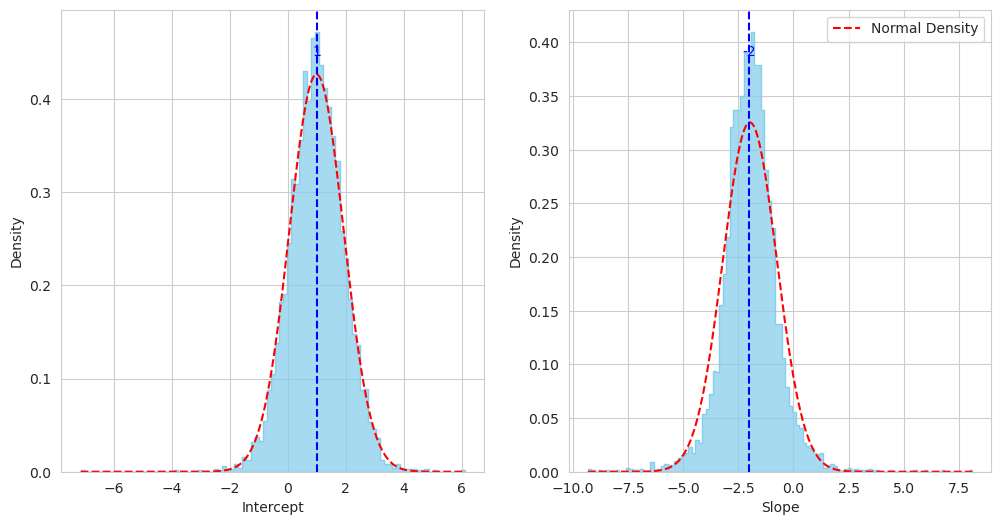

In [6]:
# Create a figure with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms of the intercept and slope with Seaborn
sns.histplot(simbetas1["beta0"], kde=False, ax=ax[0], color="skyblue", element="step", stat="density")
sns.histplot(simbetas1["beta1"], kde=False, ax=ax[1], color="skyblue", element="step", stat="density")

# Fit normal densities to the histograms
mu1, std1 = norm.fit(simbetas1["beta0"])
mu2, std2 = norm.fit(simbetas1["beta1"])

# Plot the normal densities on top of the histograms
x1 = np.linspace(simbetas1["beta0"].min(), simbetas1["beta0"].max(), 1000)
y1 = norm.pdf(x1, mu1, std1)
x2 = np.linspace(simbetas1["beta1"].min(), simbetas1["beta1"].max(), 1000)
y2 = norm.pdf(x2, mu2, std2)
ax[0].plot(x1, y1, linestyle="--", color="red", label="Normal Density")
ax[1].plot(x2, y2, linestyle="--", color="red", label="Normal Density")

# Add blue dashed lines at x=1 for the intercept and x=-2 for the slope
ax[0].axvline(x=1, color='blue', linestyle='--')
ax[1].axvline(x=-2, color='blue', linestyle='--')

# Annotate the x=1 and x=-2 on the plots
ax[0].text(1, ax[0].get_ylim()[1]*0.9, '1', color='blue', ha='center')
ax[1].text(-2, ax[1].get_ylim()[1]*0.9, '-2', color='blue', ha='center')

# Add labels and legend to the plots
ax[0].set_xlabel("Intercept")
ax[1].set_xlabel("Slope")
plt.legend()
plt.show()

#### (c-4) Constructing the Q-Q Plots
The comparison between the histogram and the normal density suggest that the histogram is less well approximated by the normal distribution at the tails of the distribution. We examine this in more detail by comparing the quantiles of the two distribution. That is to say, we compare the quantiles of the $\texttt{beta0}$ and $\texttt{beta1}$ columns to the quantiles of the corresponding normal distributions defined above by using a qqplot.

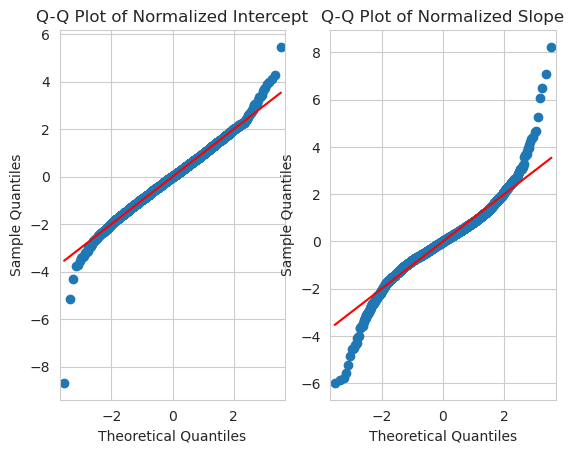

In [7]:
normalized_beta0 = (simbetas1["beta0"] - simbetas1["beta0"].mean()) / simbetas1["beta0"].std()
normalized_beta1 = (simbetas1["beta1"] - simbetas1["beta1"].mean()) / simbetas1["beta1"].std()
# Create a figure with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2)
# Generate Q-Q plots for the normalized intercept and slope
qqplot(normalized_beta0, line="s", ax=ax[0])
qqplot(normalized_beta1, line="s", ax=ax[1])
# Add titles
ax[0].set_title('Q-Q Plot of Normalized Intercept')
ax[1].set_title('Q-Q Plot of Normalized Slope')
plt.show()

### (d)
Next, replace the sample size of $5$ for the `sample_size` variable with $200$. Redo part (4c).

*Note:* We outline how you might fill out the code in separate cells. If needed, click on "Insert cell below" in the menu to add additional cells below, or simply click "b" on your keyboard while not in edit mode to add a cell below. Click "d" twice while not in edit mode to delete a cell, or go to "Edit"->"Delete Cells".

In [8]:
# (d-1) Running the simulations with 200 observations (instead of 5). Refer to c-1 above.

In [9]:
# (d-2) Compute the summary statistics. Refer to c-2 above.

In [10]:
# (d-3) Creating a histogram (and overlaying a normal density). Refer to c-3 above

In [11]:
# (d-4) Constructing the Q-Q Plots. Refer to c-4 above.

### (g) (Extra Credit)

This part seeks to clarify the meaning of the significance level.  Suppose we are now interested in testing the null that the true slope parameter is $-2$ against the two sided alternative that it is not, at a significance level $\alpha=.05$.

The python code constructs a test statistic `teststat` for testing this null for each of the 5,000 observations (remember each observation corresponds to the OLS estimates and standard errors from one data realization).

Next, the code creates a variable called `reject` that is equal to 1 if the null hypothesis is rejected for that particular observation (data set). Suppose the critical value you use is `cval`*, the code generates a new variable
`reject`equal to 1 if `|teststat| > cval`. 

Next, the code displays the fraction of rejections by displaying the mean of the `reject` variable.

<font size='1'> *The critical value for the two-sided alternative is given by the $1-\alpha$$^{th}$ quantile of the standard normal distribution and we will reject if the absolute value of the test statistic is larger than `cval`. We use the python function `norm.ppf` to compute `cval`.

In [12]:
# Compute the teststat variable
simbetas1['teststat'] = (simbetas1['beta1'] + 2) / simbetas1['sebeta1']
# Compute the cval, which is the 97.5th percentile of a standard normal distribution
cval = norm.ppf(0.975)
# Generate the reject variable, equal to 1 if the absolute value of teststat > cval, and 0 otherwise
simbetas1['reject'] = (simbetas1['teststat'].abs() > cval).astype(int)
# Compute summary statistics for the reject variable
reject_stats = simbetas1['reject'].describe().apply('{:,.2f}'.format)
print(reject_stats)

count    5,000.00
mean         0.14
std          0.35
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: reject, dtype: object


### (h) (Extra Credit)

Redo the previous part but now testing the null that the true slope parameter is equal to 1 against the two-sided alternative that it is not equal to 1 (at $\alpha=.05$).

In [13]:
# Compute the teststat2 variable
simbetas1['teststat2'] = (simbetas1['beta1']-1) / simbetas1['sebeta1']
# Generate the reject variable, equal to 1 if the absolute value of teststat > cval, and 0 otherwise
simbetas1['reject2'] = (simbetas1['teststat2'].abs() > cval).astype(int)
# Compute summary statistics for the reject variable
reject_stats2 = simbetas1['reject2'].describe().apply('{:,.2f}'.format)
print(reject_stats2)

count    5,000.00
mean         0.79
std          0.41
min          0.00
25%          1.00
50%          1.00
75%          1.00
max          1.00
Name: reject2, dtype: object


### (i) Extra Credit 

Experiment with the Python code to examine how the OLS estimates change when you change the data generating process so that the key assumptions in Key Concept 4.3 no longer hold. For instance, if the error term $\epsilon_{i}$ is drawn from a distribution where the relevant moments do not exist or are infinite. This can be achieved by changing the line generating the error term e to `e = np.random.standard_cauchy(sample_size)`.

*Note:* If needed, click on "Insert cell below" in the menu to add additional cells below, or simply click "b" on your keyboard while not in edit mode to add a cell below. Click "d" twice while not in edit mode to delete a cell, or go to "Edit"->"Delete Cells".